In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [8]:


class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()


In [9]:

# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, (N_samples, N_inputs))
Y_train = np.prod(X_train, axis=1)

X_validation = np.random.randint(0, 2, (N_validation, N_inputs))
Y_validation = np.prod(X_validation, axis=1)

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]]
Y_data (first 5 samples):
[0 0 0 0 1]


In [10]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.01897713956195105 | val error: 0.0016045338383958426
epoch: 10 | train error: 1.4631337519688802e-05 | val error: 1.3294512157223085e-05
epoch: 20 | train error: 3.8081597416798085e-06 | val error: 3.62375972646154e-06
epoch: 30 | train error: 1.714869983744963e-06 | val error: 1.6582186203655246e-06
epoch: 40 | train error: 9.708195009658684e-07 | val error: 9.464316344945348e-07
epoch: 50 | train error: 6.236721205687421e-07 | val error: 6.110121447426019e-07
epoch: 60 | train error: 4.3417711393939696e-07 | val error: 4.2677284536480486e-07
epoch: 70 | train error: 3.195421526780919e-07 | val error: 3.148384830181802e-07
epoch: 80 | train error: 2.4496421044821835e-07 | val error: 2.4178911689226177e-07
epoch: 90 | train error: 1.9374321928949738e-07 | val error: 1.914979912000494e-07


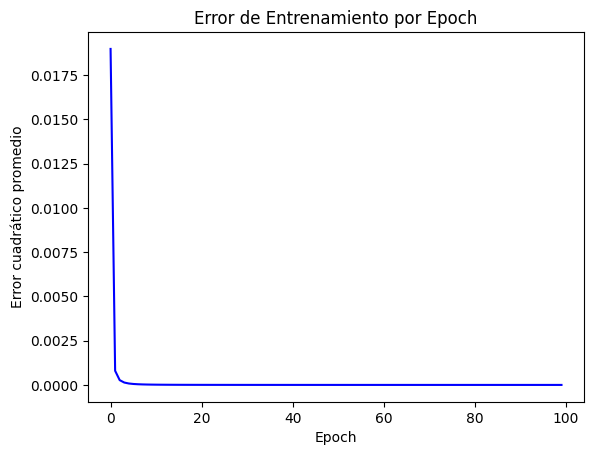

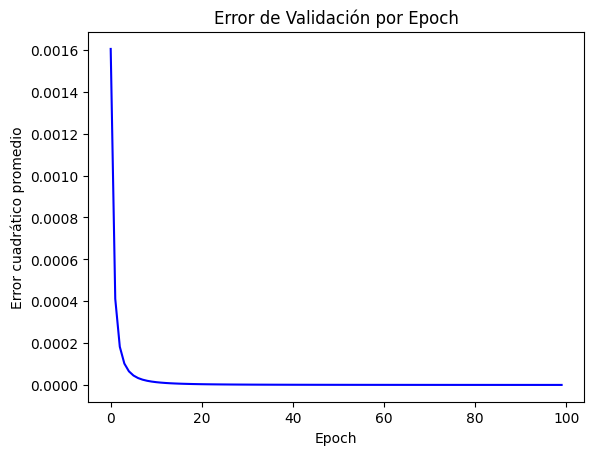

In [11]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [13]:
# Validar el modelo

# Generar las predicciones
predictions = [perceptron_and.predict(x) for x in X_validation]

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, np.round(predictions))

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[754   0]
 [  0 245]]


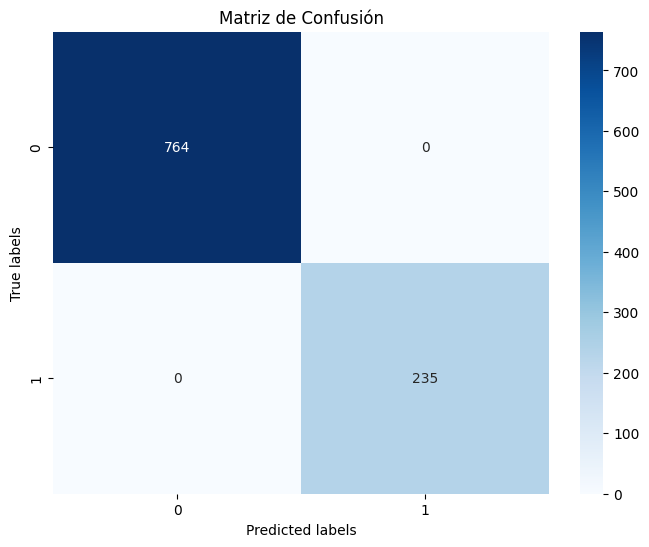

In [7]:
import seaborn as sns

# Matriz de Confusión
conf_matrix = [[764, 0], [0, 235]]

# Visualización del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()
